### About the dataset
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("/content/dl2dataset.csv")
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [4]:
df.shape

(50000, 2)

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [6]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [8]:
print(df.duplicated().sum())
print(df.isnull().sum())

418
review       0
sentiment    0
dtype: int64


In [10]:
X = df['review'][:10000]
y = df['sentiment'][:10000]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 1])

In [12]:
le.classes_

array(['negative', 'positive'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
y_train = y_train.astype('float32').reshape((-1, 1))
y_test = y_test.astype('float32').reshape((-1, 1))

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000,) (2000,)
(8000, 1) (2000, 1)


In [16]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

max_len = 512

In [17]:
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)

In [18]:
%%time
vectorize_layer.adapt(X_train) 

CPU times: user 1.15 s, sys: 70.5 ms, total: 1.22 s
Wall time: 1.2 s


In [19]:
vocab_len = len(vectorize_layer.get_vocabulary())
vocab_len

66371

In [20]:
model = Sequential()
model.add(Input(shape=(1,), dtype = tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(MaxPooling1D(4, 1, padding = 'same'))
model.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [22]:
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 256)          16990976  
                                                                 
 conv1d (Conv1D)             (None, 512, 32)           40992     
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 16)           2576      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 16)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 128)              4

In [23]:
%%time
hist = model.fit(X_train, y_train,
          epochs= 6, validation_data = (X_test, y_test))

Epoch 1/6
250/250 [==============================] - 72s 229ms/step - loss: 0.6574 - accuracy: 0.6026 - val_loss: 0.5612 - val_accuracy: 0.7565
Epoch 2/6
250/250 [==============================] - 41s 162ms/step - loss: 0.4517 - accuracy: 0.8025 - val_loss: 0.5067 - val_accuracy: 0.7765
Epoch 3/6
250/250 [==============================] - 34s 138ms/step - loss: 0.2193 - accuracy: 0.9214 - val_loss: 0.4434 - val_accuracy: 0.8410
Epoch 4/6
250/250 [==============================] - 25s 100ms/step - loss: 0.0841 - accuracy: 0.9772 - val_loss: 0.5829 - val_accuracy: 0.8145
Epoch 5/6
250/250 [==============================] - 22s 90ms/step - loss: 0.0436 - accuracy: 0.9891 - val_loss: 0.7431 - val_accuracy: 0.8170
Epoch 6/6
250/250 [==============================] - 20s 81ms/step - loss: 0.0320 - accuracy: 0.9954 - val_loss: 0.7971 - val_accuracy: 0.8275
CPU times: user 2min 50s, sys: 5.69 s, total: 2min 55s
Wall time: 3min 34s


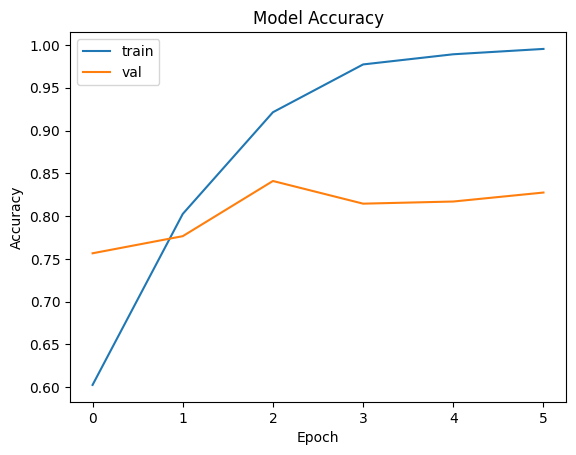

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

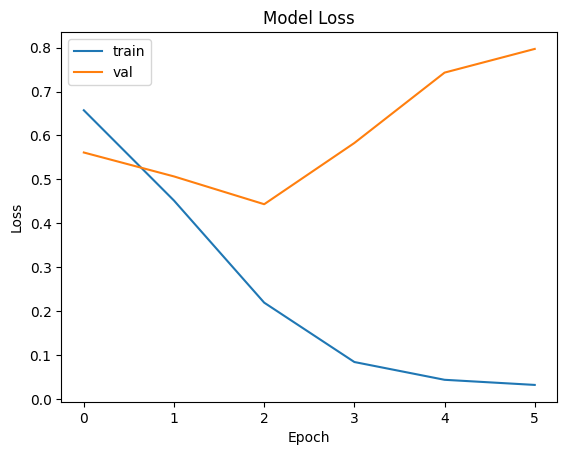

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
def predict_sentiment(text, model):
    text = [text]
    pred = model.predict(text)
    print(pred)
    if pred > 0.5:
        return "Positive"
    else:
        return "Negative"

In [27]:
pst_txt = '''One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.'''
predict_sentiment(pst_txt, model)

1/1 [==============================] - 1s 755ms/step
[[0.99866736]]


'Positive'

In [28]:
ngt_txt ='''Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.'''
predict_sentiment(ngt_txt, model)

1/1 [==============================] - 0s 41ms/step
[[0.00082952]]


'Negative'

In [29]:
ngt_txt2 = '''It's become extremely difficult to find a good horror movie anymore, thought this movie was a good thriller.<br /><br />Could have had better production values but what kept me going was the suspense and the twists. I had real reservations before seeing this movie (because of the cover). I was afraid that it would be excessively bloody and gory. I was wrong.<br /><br />Although there is a lot of scary parts, there is a lot of suspense and drama too.<br /><br />The acting in Dead Line was better than what you would expect from a micro budget horror flick. The characters were believable<br /><br />The movie is really thrilling and quite scary at moments so it makes you grab your seat until the ending credits roll<br /><br />Because of its production values (the sound is not very good for example) 8/10.'''
predict_sentiment(ngt_txt2, model)

1/1 [==============================] - 0s 46ms/step
[[0.99124616]]


'Positive'

In [30]:
text3 = '''This movie is incredible. If you have the chance, watch it. Although, a warning, you'll cry your eyes out. I do, every time I see it, and I own it and have watched it many times. The performances are outstanding. It deals with darkness and pain and loss, but there is hope. This movie made me look at the world differently: vicarious experience, according to my English teacher. Also, if you've seen it, note the interesting use of shadows and light. Home room is a phenomenal movie, and I rate it 10/10 - for real - because of the excellent acting, amazing plot, and heart-wrenching dialogue. Very tense, very moving. Doesn't give all the answers, but makes many good points about humankind'''
predict_sentiment(text3, model)

1/1 [==============================] - 0s 41ms/step
[[0.9995161]]


'Positive'

In [31]:
txt = '''What a frustrating movie. A small Southern town is overflowing with possibilities for exploring the complexities of interpersonal relationships and dark underbellies hidden beneath placid surfaces, as anyone who has read anything by Carson McCullers already knows. This does none of that. Instead, the writers settled for cutesy twinkles, cheap warm fuzzies and banal melodrama. The thing looks like a made-for-TV movie, and was directed with no particular distinction, but it's hard to imagine what anyone could have done to make this material interesting.<br /><br />The most frustrating aspect, though, is the fact that there are a lot of extremely competent and appealing actors in this cast, all trying gamely to make the best of things and do what they can with this--well, there's no other word for it--drivel. A tragic waste of talent, in particular that of the great Stockard Channing.'''
predict_sentiment(txt, model)

1/1 [==============================] - 0s 42ms/step
[[0.00055554]]


'Negative'

In [32]:
eval = model.evaluate(X_test, y_test)
print(f"Accuracy : {eval[1]*100}%")

63/63 [==============================] - 1s 19ms/step - loss: 0.7971 - accuracy: 0.8275
Accuracy : 82.74999856948853%
